## Plan of Action


1.   Load **GoEmotion dataset (58K reviews)**
2.   **Pre-process dataset** by removing special characters, numbers, etc. from user reviews + convert **sentiment labels** to numbers 0 - 13, respectively
3.   **Import GloVe Word Embedding** to build Embedding Dictionary + Use this to build Embedding Matrix for our Corpus
4. Model Training using **Deep Learning in Keras** for separate: **Simple Neural Net, CNN and LSTM Models** and analyse model performance and results
4. Last, perform **predictions on real reviews**

## Setting the environment

In [1]:
%%capture
!pip install -r requirements.txt

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
from src.utilities import Utilities
util = Utilities()

randomState = 42

## Loading dataset

In [3]:
# Importing GoEmotion dataset

# emotions = pd.read_csv("/content/driver/MyDrive/NLP-2023-main/CourseWork/Sentiment_Analysis/files/Goemotions_team_v2.csv")
# emotions = pd.read_csv("dataset/Goemotions_team_v2.csv")
emotions = pd.read_csv("dataset/Goemotions_team_v2_reduced.csv")
emotions.sentiments = emotions.sentiments.apply(str)
emotions.shape

(46134, 5)

In [4]:
emotions.head(5)

,Unique ID,text,id,sentiments,team_description
0,0,My favourite food is anything I didn't have to...,eebbqej,13,neutral
1,1,"Now if he does off himself, everyone will thin...",ed00q6i,13,neutral
2,2,WHY THE FUCK IS BAYLESS ISOING,eezlygj,7,anger
3,3,To make her feel threatened,ed7ypvh,10,fear
4,4,Dirty Southern Wankers,ed0bdzj,8,disgust


## Visualisation

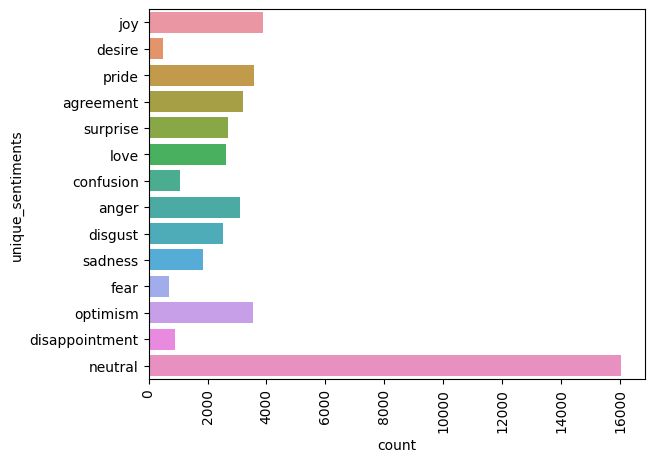

In [5]:
from src.analyze_data import AnalyzeData

analyzeData = AnalyzeData()
analyzeData.plot_label_frequency(emotions)

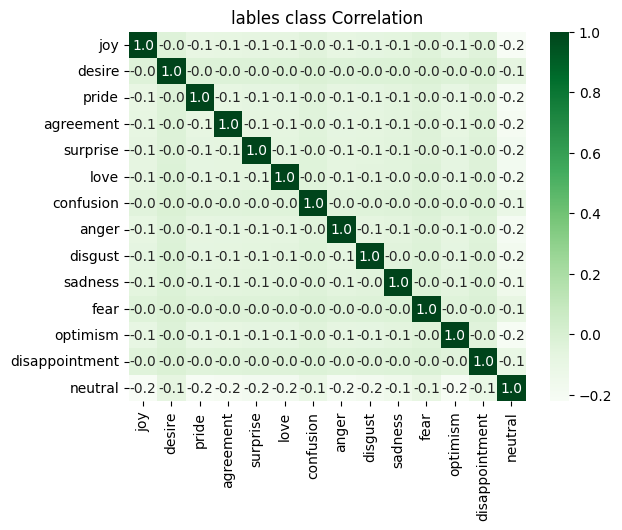

In [6]:
analyzeData.plot_correlation(util.one_hot_encode(list(emotions['sentiments'])))

## Experimenting with Data Preprocessing

### With Stop Words

Scatter Plot for using with Stopwords range between 100 to 200


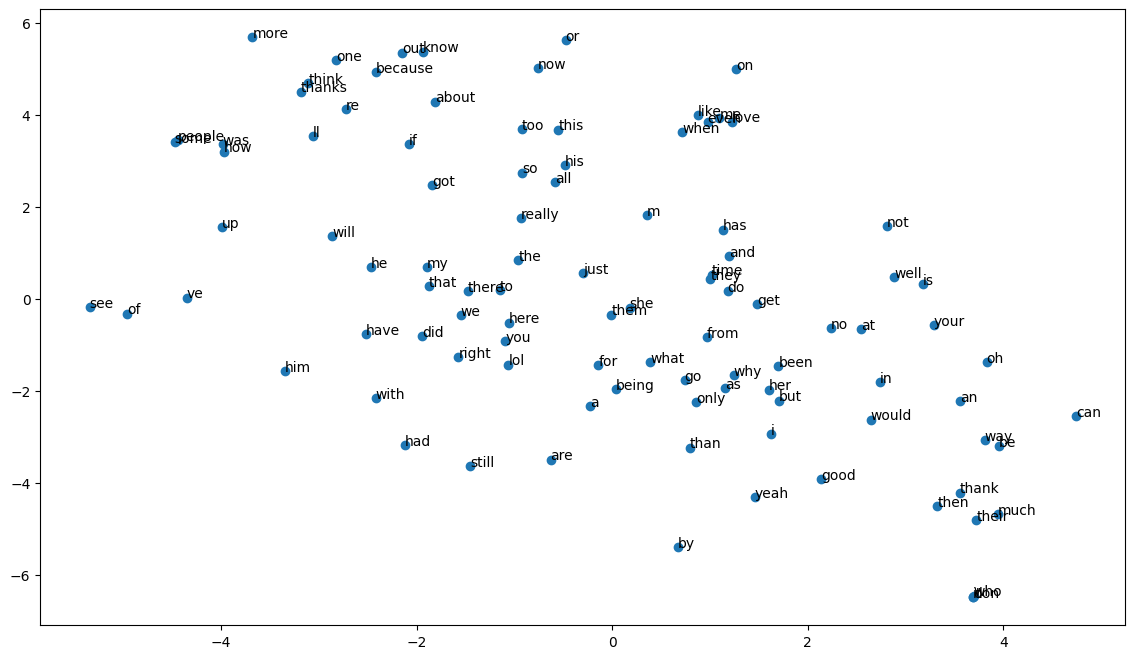

Embedding Layers of SNN
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          2384200   
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 128)               1280128   
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                

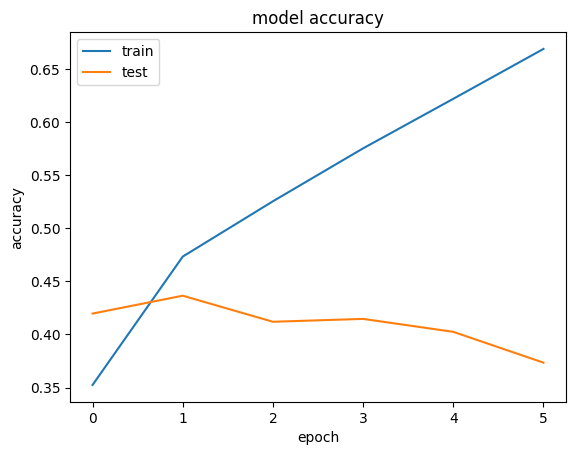

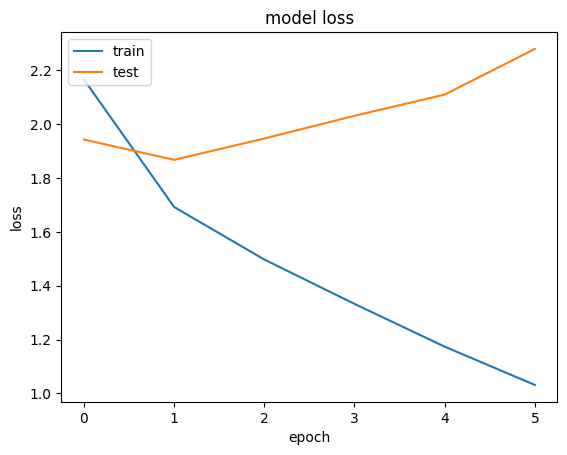

Classification Report
              precision    recall  f1-score   support

           0       0.39      0.35      0.37       772
           1       0.33      0.22      0.27        99
           2       0.32      0.49      0.38       718
           3       0.19      0.13      0.15       638
           4       0.32      0.14      0.19       549
           5       0.33      0.46      0.38       497
           6       0.08      0.03      0.04       228
           7       0.20      0.26      0.22       592
           8       0.17      0.16      0.16       484
           9       0.30      0.24      0.26       353
          10       0.11      0.07      0.09       134
          11       0.77      0.48      0.59       701
          12       0.05      0.06      0.05       190
          13       0.53      0.59      0.56      3272

    accuracy                           0.39      9227
   macro avg       0.29      0.26      0.27      9227
weighted avg       0.39      0.39      0.39      9227



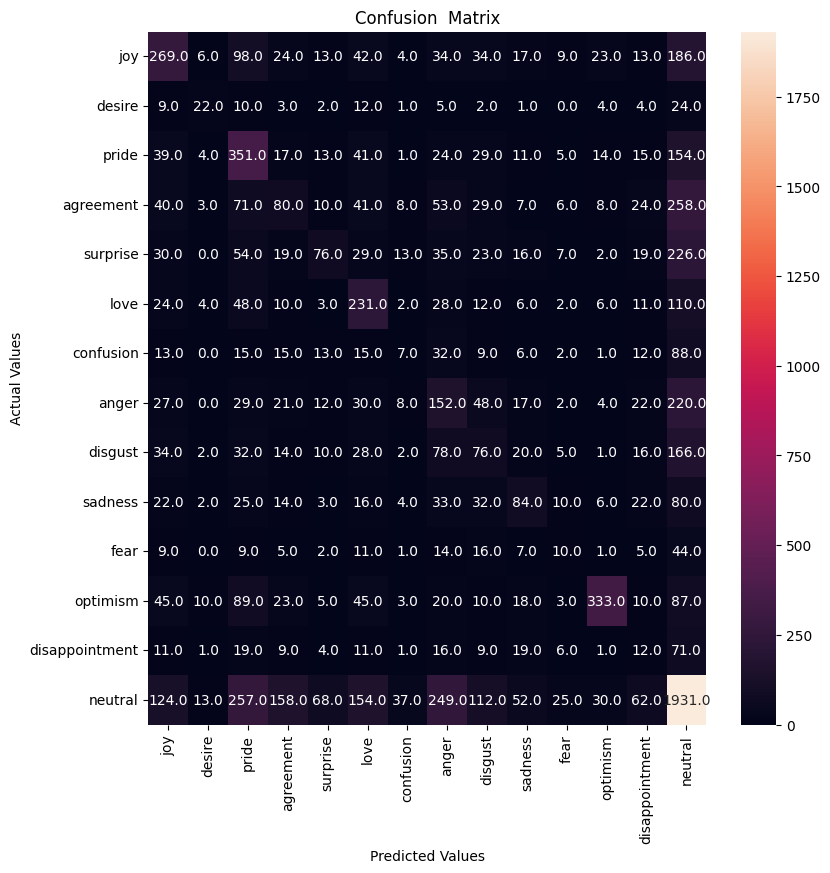

In [7]:
from src.exp.e1 import Exp1
exp1 = Exp1()

exp1.run(emotions, withStopwords=True, randomState = randomState)

### Without Stop Words

Scatter Plot for using with Stopwords range between 100 to 200


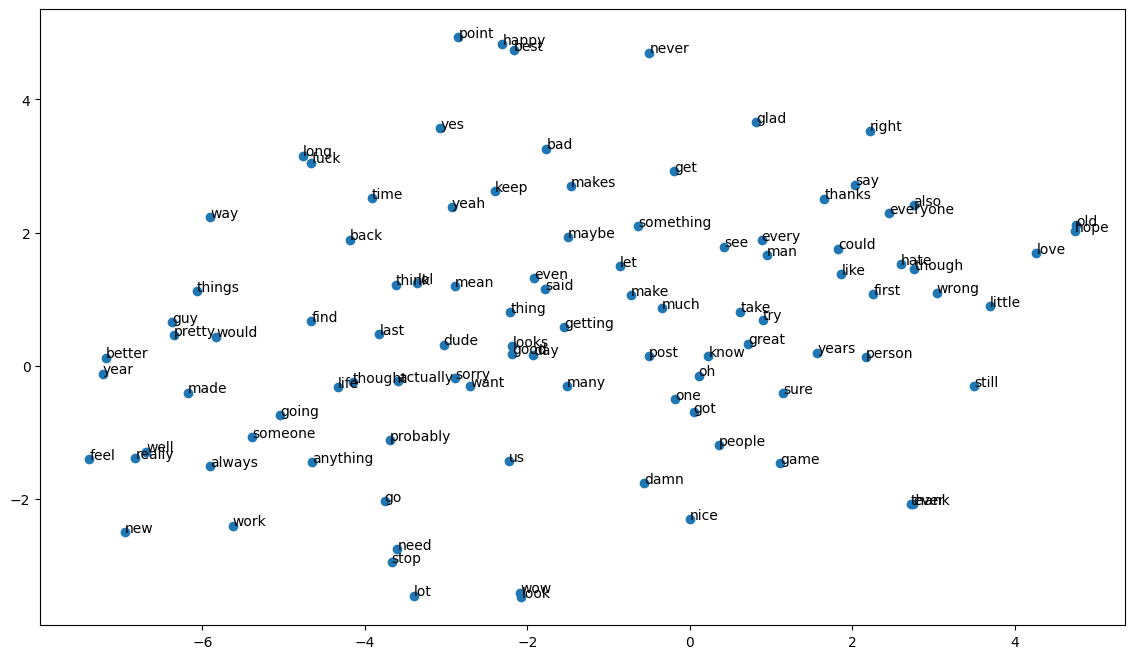

Embedding Layers of SNN
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          2369200   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               1280128   
                                                                 
 batch_normalization_2 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_3 (Batc  (None, 64)               256       
 hNormalization)              

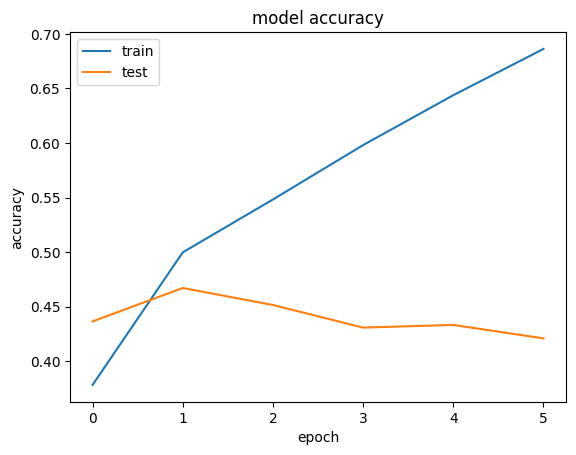

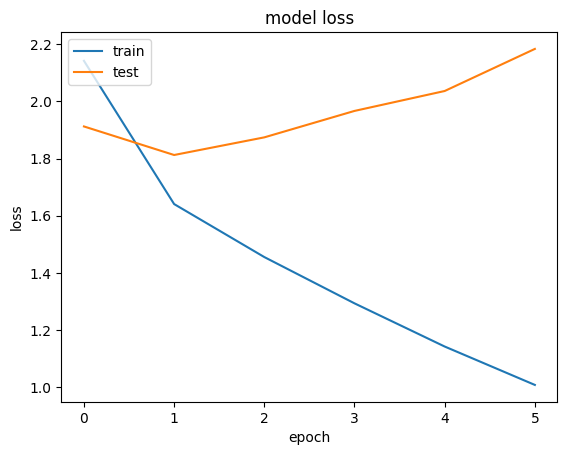

Classification Report
              precision    recall  f1-score   support

           0       0.44      0.48      0.46       772
           1       0.37      0.22      0.28        99
           2       0.46      0.45      0.45       718
           3       0.20      0.11      0.14       638
           4       0.26      0.14      0.18       549
           5       0.52      0.46      0.49       497
           6       0.02      0.00      0.01       228
           7       0.19      0.16      0.17       592
           8       0.23      0.21      0.22       484
           9       0.38      0.36      0.37       353
          10       0.19      0.18      0.18       134
          11       0.57      0.67      0.62       701
          12       0.12      0.06      0.08       190
          13       0.51      0.65      0.57      3272

    accuracy                           0.44      9227
   macro avg       0.32      0.30      0.30      9227
weighted avg       0.40      0.44      0.42      9227



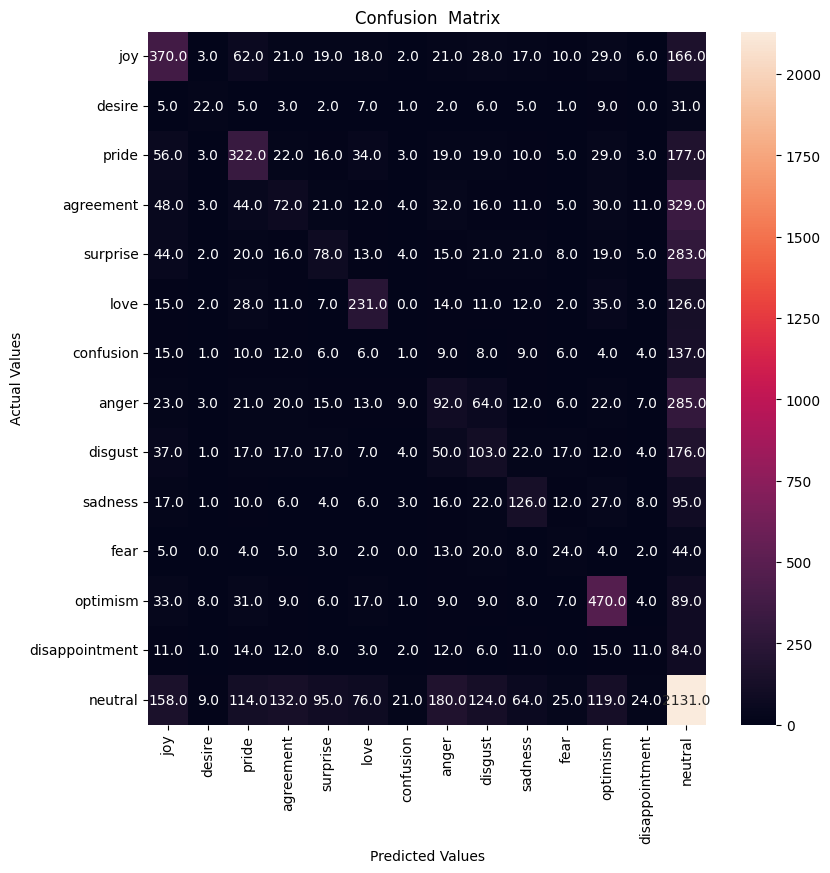

In [8]:
exp1.run(emotions, withStopwords=False, randomState = randomState)

## Experiment with Vectorization Technics

### Vectorization using Glove.

Scatter Plot for using with Stopwords range between 100 to 200


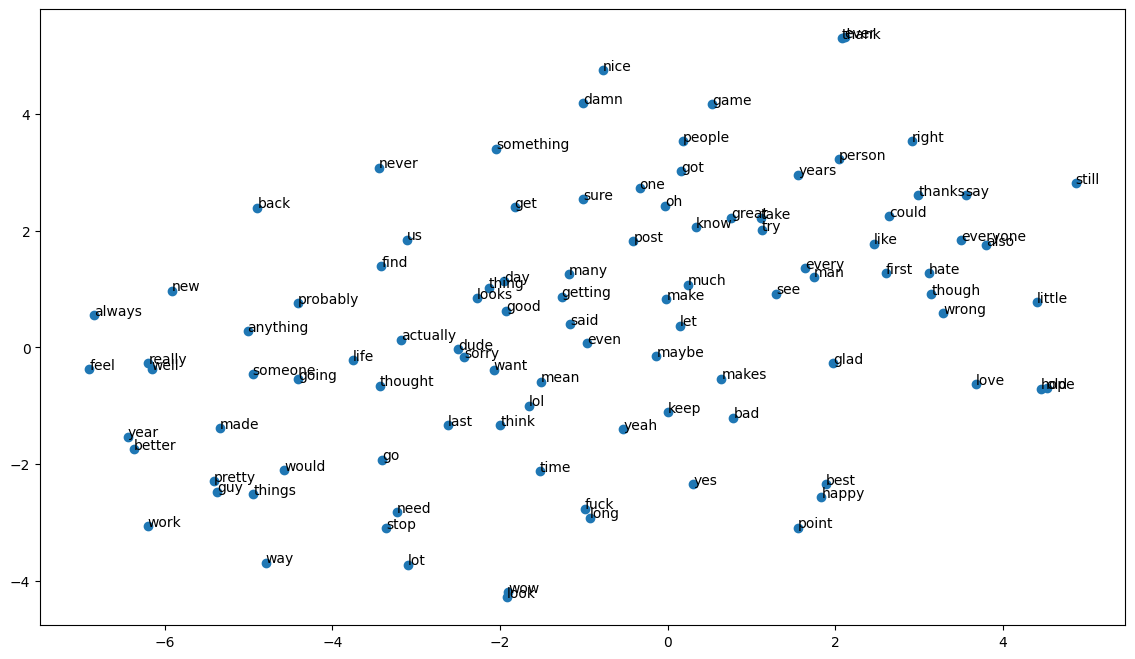

Embedding Layers of SNN
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          2369200   
                                                                 
 flatten_2 (Flatten)         (None, 10000)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               1280128   
                                                                 
 batch_normalization_4 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_5 (Batc  (None, 64)               256       
 hNormalization)              

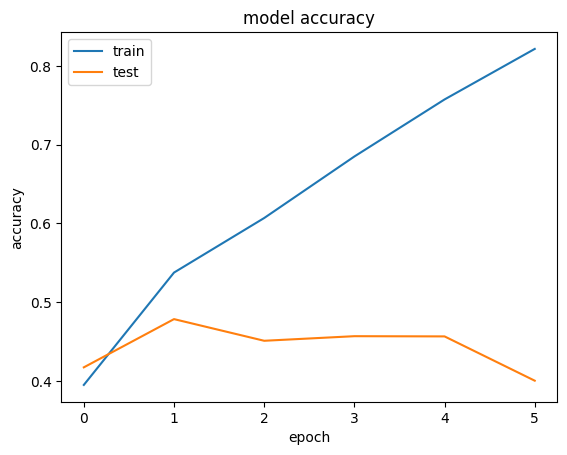

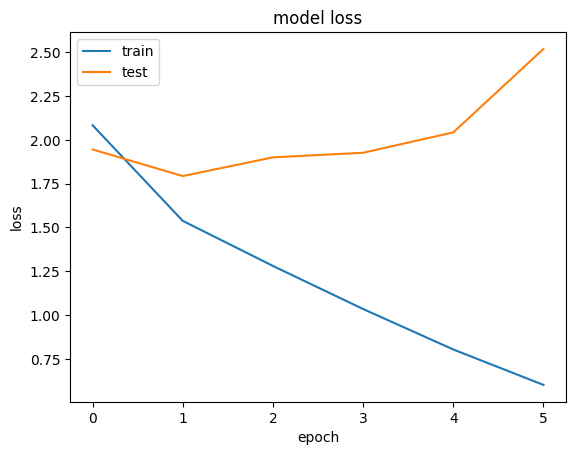

Classification Report
              precision    recall  f1-score   support

           0       0.49      0.58      0.53       772
           1       0.09      0.48      0.16        99
           2       0.48      0.54      0.50       718
           3       0.16      0.26      0.19       638
           4       0.24      0.23      0.23       549
           5       0.36      0.60      0.45       497
           6       0.06      0.01      0.02       228
           7       0.35      0.14      0.20       592
           8       0.28      0.19      0.23       484
           9       0.40      0.41      0.40       353
          10       0.28      0.40      0.33       134
          11       0.83      0.62      0.71       701
          12       0.06      0.14      0.08       190
          13       0.57      0.43      0.49      3272

    accuracy                           0.40      9227
   macro avg       0.33      0.36      0.32      9227
weighted avg       0.45      0.40      0.41      9227



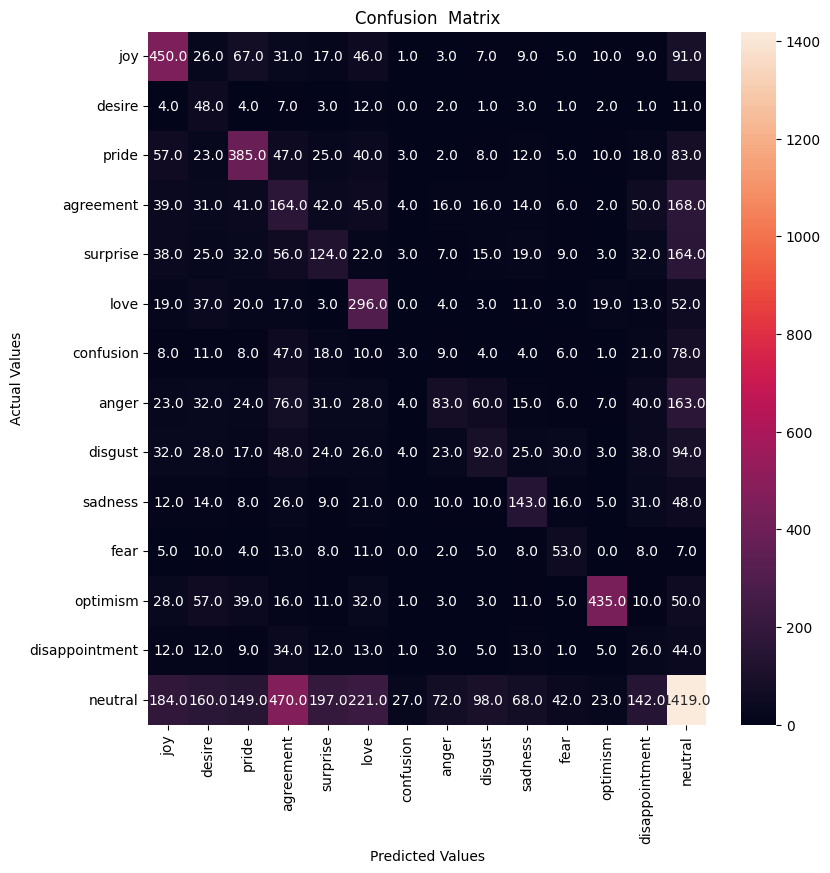

In [9]:
from src.exp.e2 import Exp2
exp2 = Exp2()

exp2.run(emotions, randomState=randomState, vec = 'glove')


### Vectroization using Word2Vec

Embedding Layers of SNN
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          2700      
                                                                 
 flatten_3 (Flatten)         (None, 10000)             0         
                                                                 
 dense_9 (Dense)             (None, 128)               1280128   
                                                                 
 batch_normalization_6 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_7 (Batc  (None, 64)               256       
 hNormalization)              

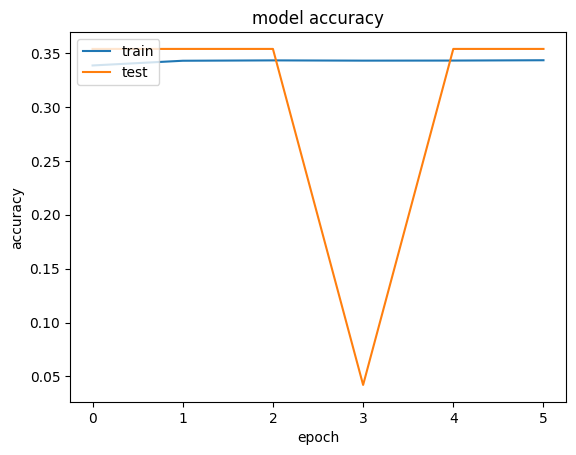

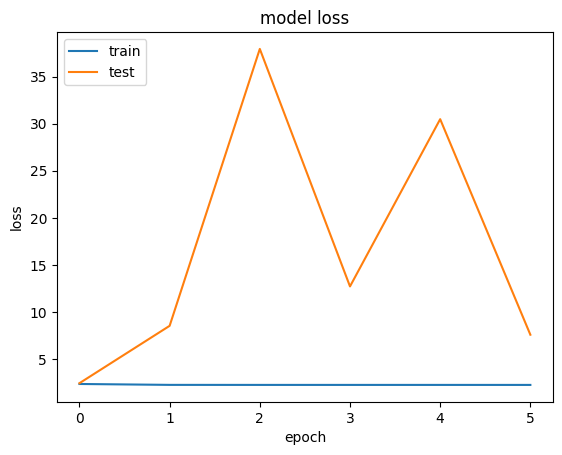

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       772
           1       0.00      0.00      0.00        99
           2       0.00      0.00      0.00       718
           3       0.00      0.00      0.00       638
           4       0.00      0.00      0.00       549
           5       0.00      0.00      0.00       497
           6       0.00      0.00      0.00       228
           7       0.00      0.00      0.00       592
           8       0.00      0.00      0.00       484
           9       0.00      0.00      0.00       353
          10       0.00      0.00      0.00       134
          11       0.00      0.00      0.00       701
          12       0.00      0.00      0.00       190
          13       0.35      1.00      0.52      3272

    accuracy                           0.35      9227
   macro avg       0.03      0.07      0.04      9227
weighted avg       0.13      0.35      0.19      9227



c:\Users\alagu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alagu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alagu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

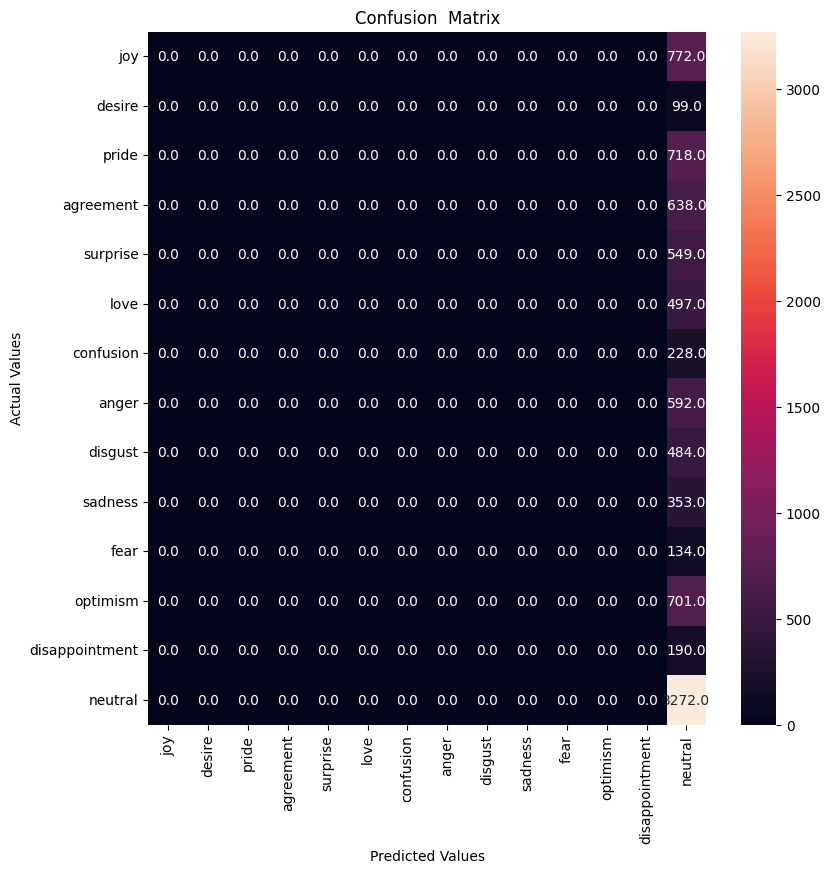

In [10]:
exp2.run(emotions, randomState=randomState, vec = 'word2vec')

## Experimenting with Neural Network

### Simple Neural Network

#### This Experiment variation I already coverd in Ex2, as Using without stopwords data preprocessing, Glove Vectrorization and Simple Neural Network. So, I can enquire the rest of the neural networks in the below.

Scatter Plot for using with Stopwords range between 100 to 200


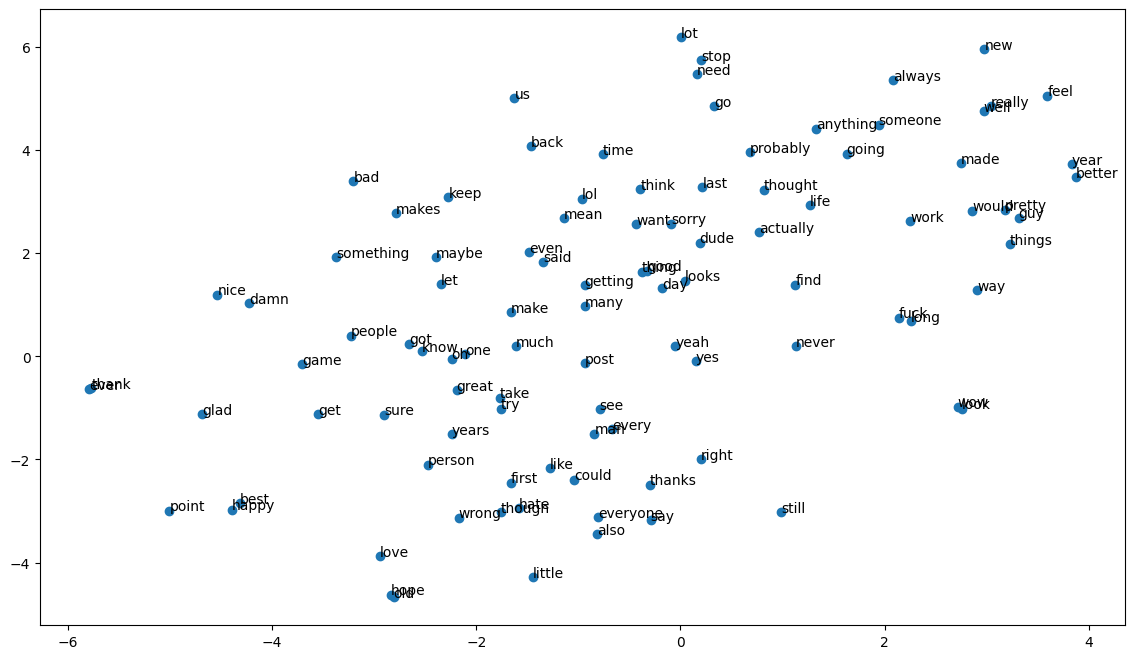

Embedding Layers of SNN
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 100)          2369200   
                                                                 
 flatten_4 (Flatten)         (None, 10000)             0         
                                                                 
 dense_12 (Dense)            (None, 128)               1280128   
                                                                 
 batch_normalization_8 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_9 (Batc  (None, 64)               256       
 hNormalization)              

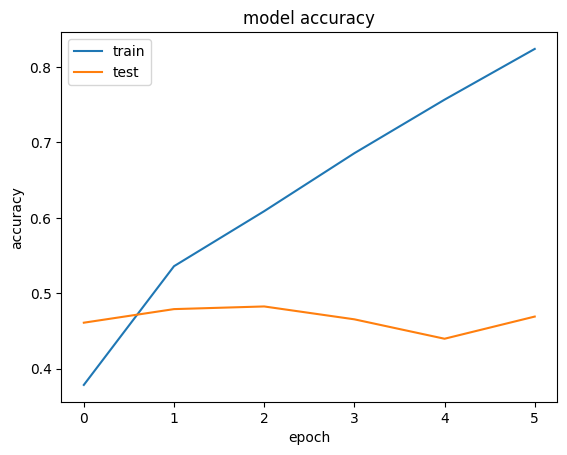

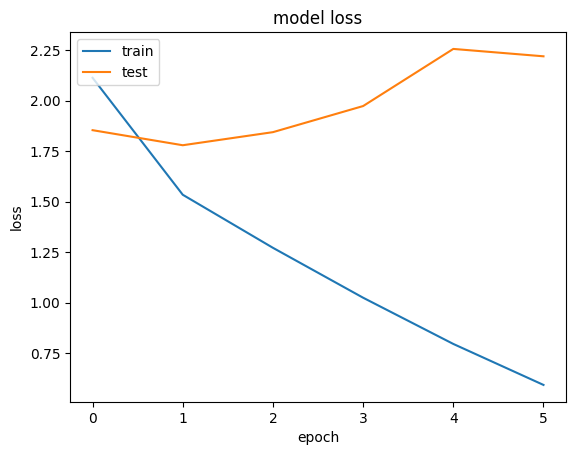

Classification Report
              precision    recall  f1-score   support

           0       0.55      0.54      0.55       772
           1       0.35      0.26      0.30        99
           2       0.59      0.49      0.54       718
           3       0.20      0.16      0.18       638
           4       0.44      0.16      0.24       549
           5       0.51      0.55      0.53       497
           6       0.14      0.06      0.08       228
           7       0.21      0.21      0.21       592
           8       0.23      0.19      0.21       484
           9       0.40      0.50      0.44       353
          10       0.46      0.20      0.28       134
          11       0.78      0.70      0.74       701
          12       0.08      0.06      0.07       190
          13       0.52      0.67      0.59      3272

    accuracy                           0.48      9227
   macro avg       0.39      0.34      0.35      9227
weighted avg       0.46      0.48      0.46      9227



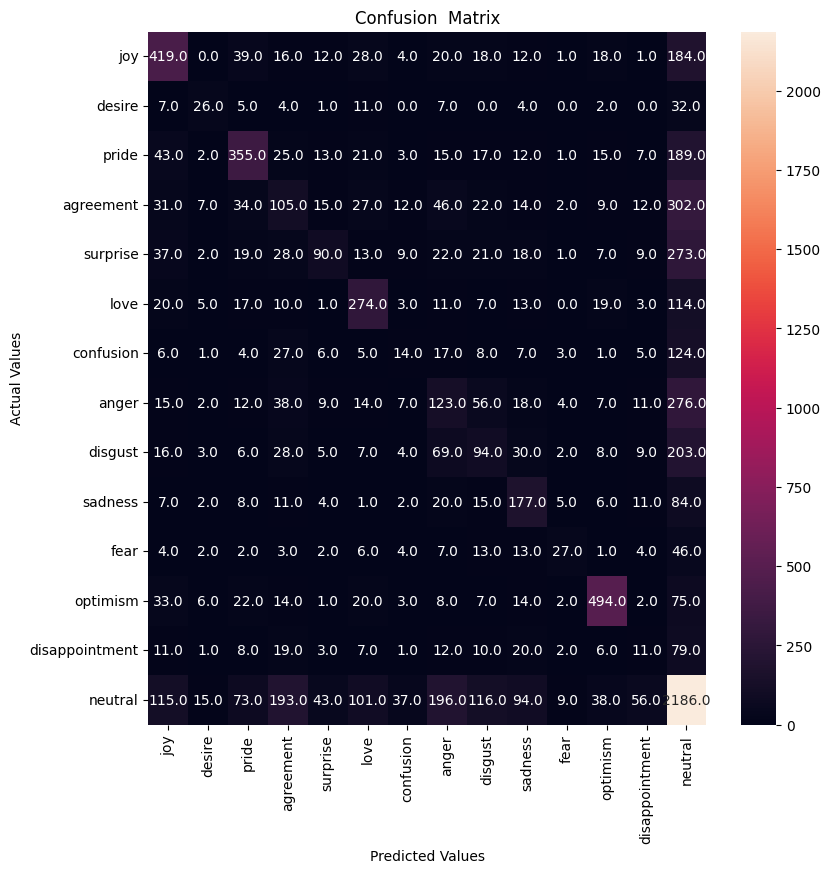

In [11]:
from src.exp.e3 import Exp3
exp3 = Exp3()

exp3.run(emotions, randomState=randomState, net = 'SNN')

### Convolutional Neural Network

Scatter Plot for using with Stopwords range between 100 to 200


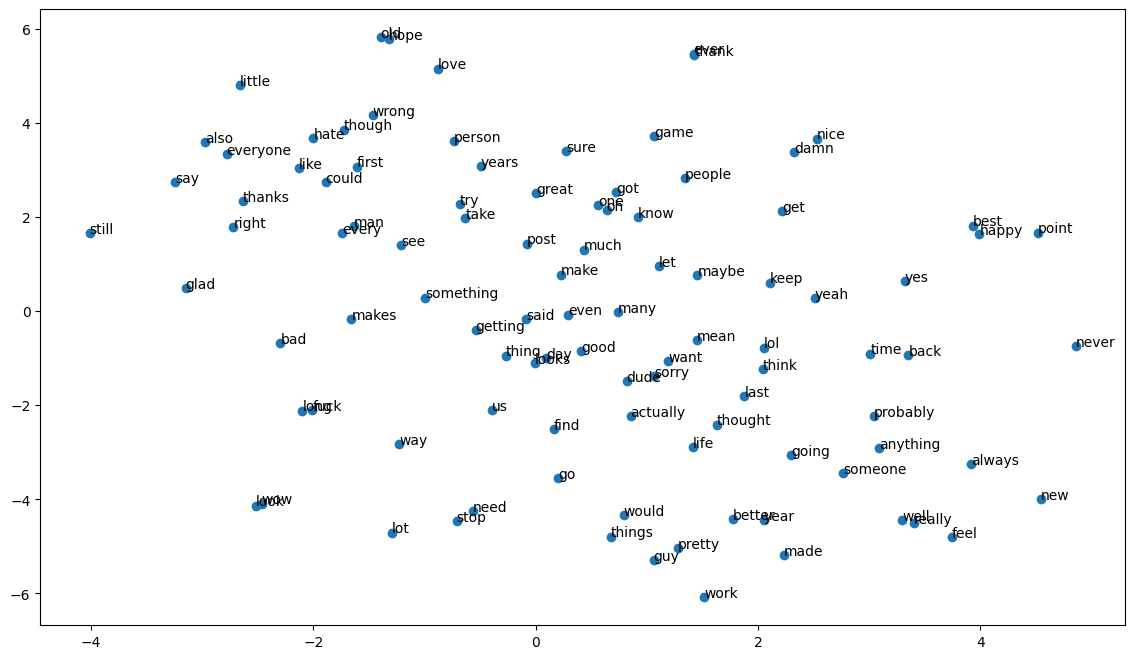

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 100)          2369200   
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 conv1d_1 (Conv1D)           (None, 92, 256)           164096    
                                                                 
 global_max_pooling1d (Globa  (None, 256)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_15 (Dense)            (None, 128)               32896     
                                                                 
 dense_16 (Dense)            (None, 14)                1806      
                                                      

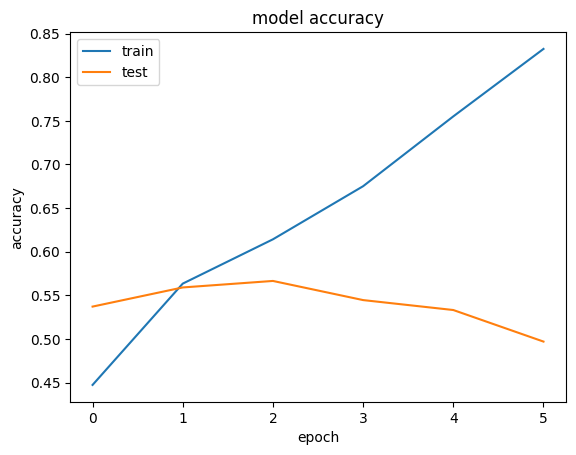

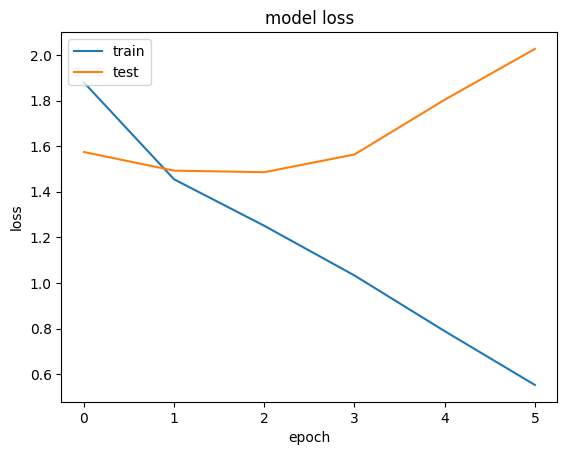

Classification Report
              precision    recall  f1-score   support

           0       0.64      0.60      0.62       772
           1       0.43      0.37      0.40        99
           2       0.67      0.52      0.59       718
           3       0.23      0.17      0.19       638
           4       0.41      0.28      0.33       549
           5       0.47      0.64      0.54       497
           6       0.14      0.19      0.16       228
           7       0.24      0.29      0.26       592
           8       0.38      0.19      0.25       484
           9       0.58      0.51      0.54       353
          10       0.53      0.47      0.50       134
          11       0.87      0.72      0.79       701
          12       0.13      0.14      0.14       190
          13       0.56      0.66      0.60      3272

    accuracy                           0.51      9227
   macro avg       0.45      0.41      0.42      9227
weighted avg       0.51      0.51      0.50      9227



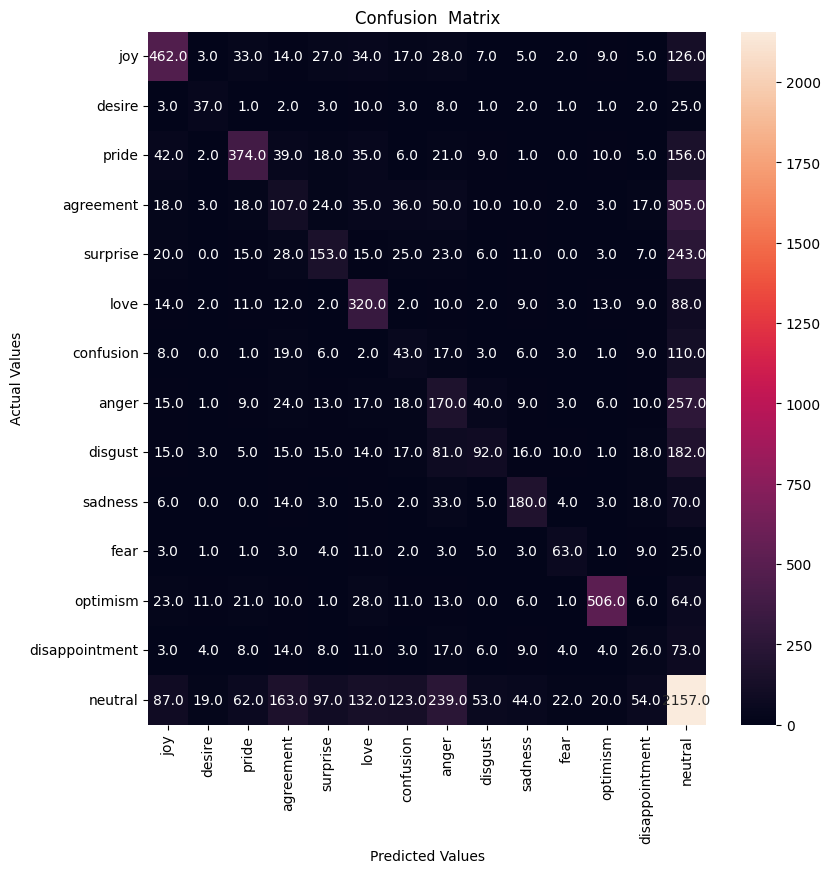

In [12]:
exp3.run(emotions, randomState=randomState, net = 'CNN')

### (RNN) Long-Short Term Memory

Scatter Plot for using with Stopwords range between 100 to 200


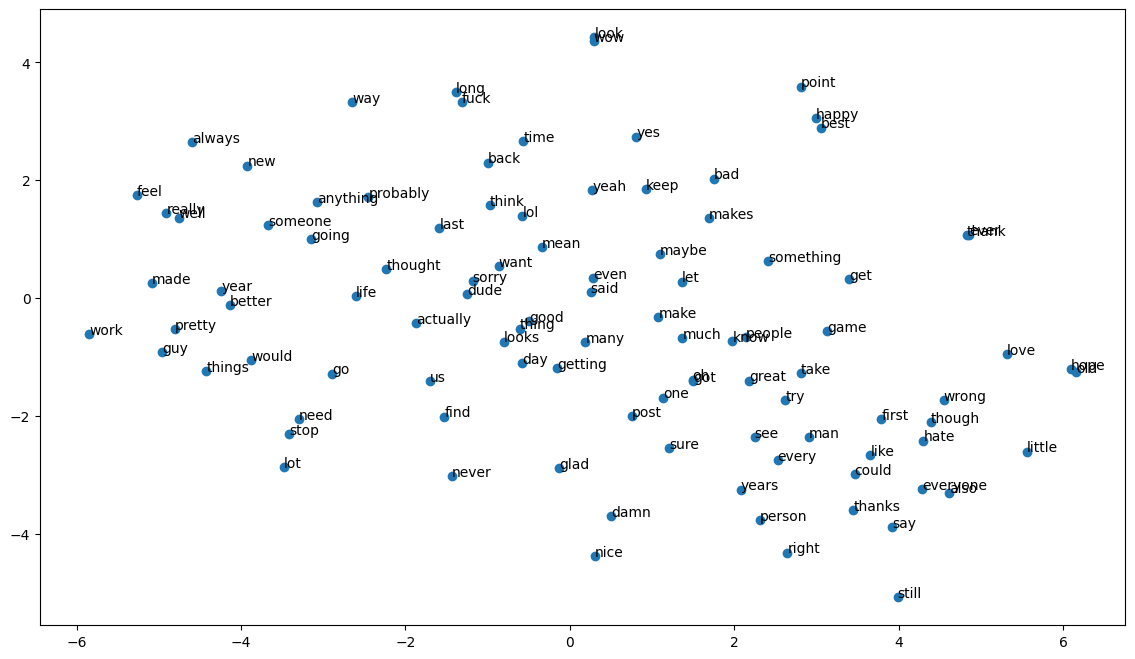

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 100)          2369200   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_10 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dense_18 (Dense)            (None, 14)                910       
                                                                 
Total params: 2,495,870
Trainable params: 2,495,742
Non-trainable params: 128
__________________________________________

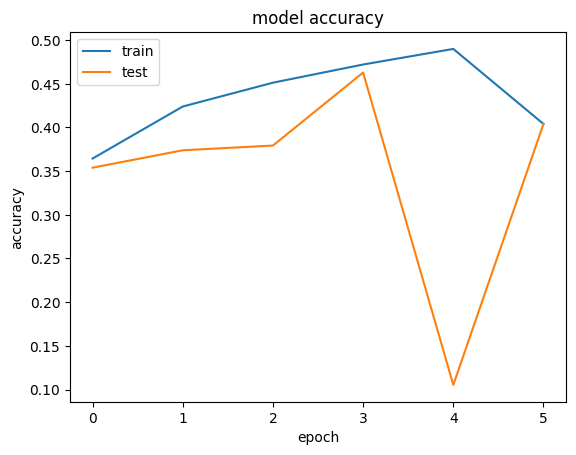

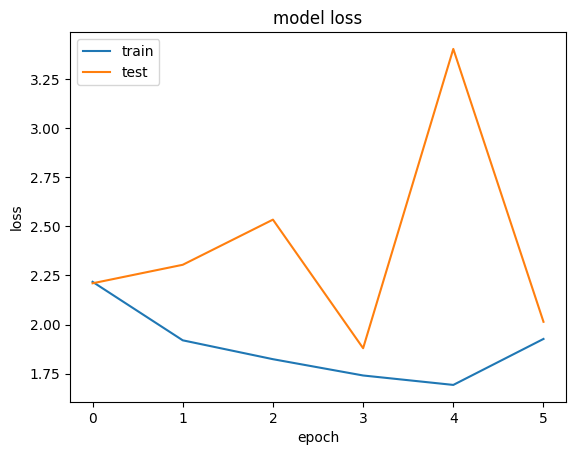

Classification Report
              precision    recall  f1-score   support

           0       0.26      0.78      0.39       772
           1       0.00      0.00      0.00        99
           2       0.00      0.00      0.00       718
           3       0.00      0.00      0.00       638
           4       0.00      0.00      0.00       549
           5       0.54      0.46      0.50       497
           6       0.00      0.00      0.00       228
           7       0.00      0.00      0.00       592
           8       0.00      0.00      0.00       484
           9       0.61      0.29      0.39       353
          10       0.00      0.00      0.00       134
          11       0.00      0.00      0.00       701
          12       0.00      0.00      0.00       190
          13       0.46      0.88      0.61      3272

    accuracy                           0.42      9227
   macro avg       0.13      0.17      0.13      9227
weighted avg       0.24      0.42      0.29      9227



c:\Users\alagu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alagu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alagu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

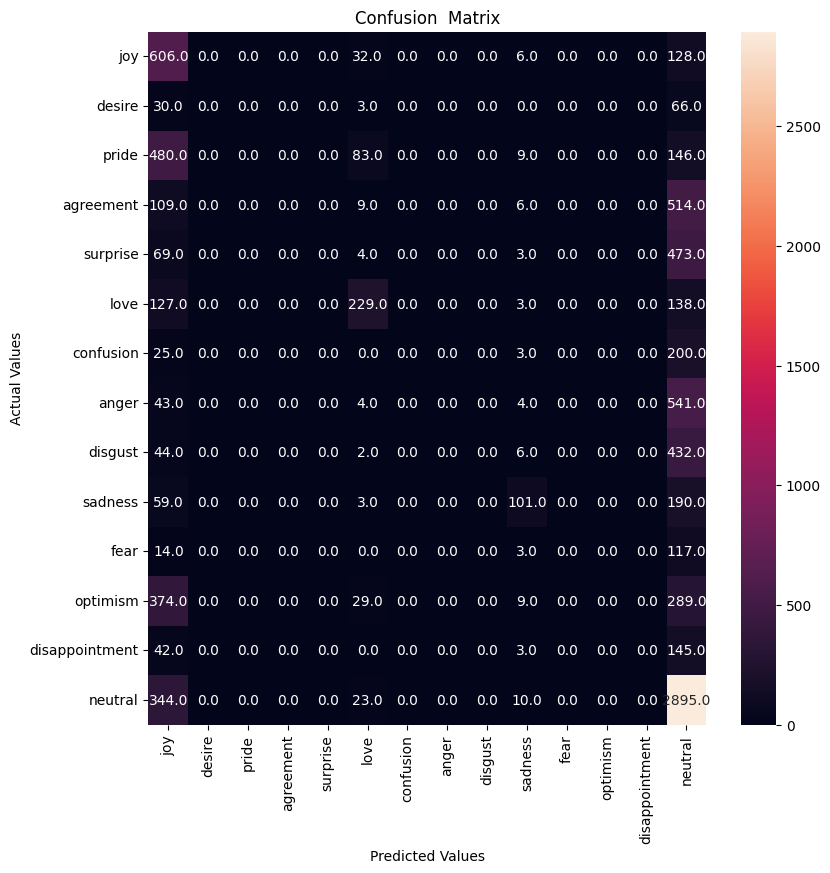

In [13]:
exp3.run(emotions, randomState=randomState, net = 'LSTM')

## Experimenting with Hyperparameters

### Learning rate with 0.01

Scatter Plot for using with Stopwords range between 100 to 200


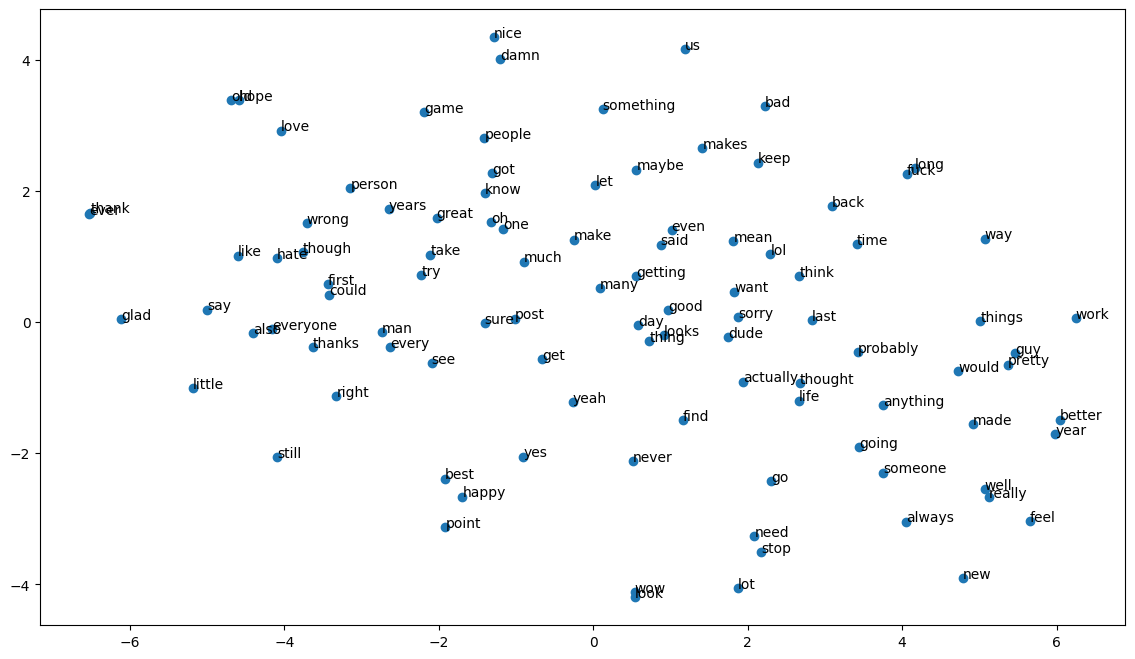

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 100)          2369200   
                                                                 
 conv1d_2 (Conv1D)           (None, 96, 128)           64128     
                                                                 
 conv1d_3 (Conv1D)           (None, 92, 256)           164096    
                                                                 
 global_max_pooling1d_1 (Glo  (None, 256)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dense_20 (Dense)            (None, 14)                1806      
                                                      

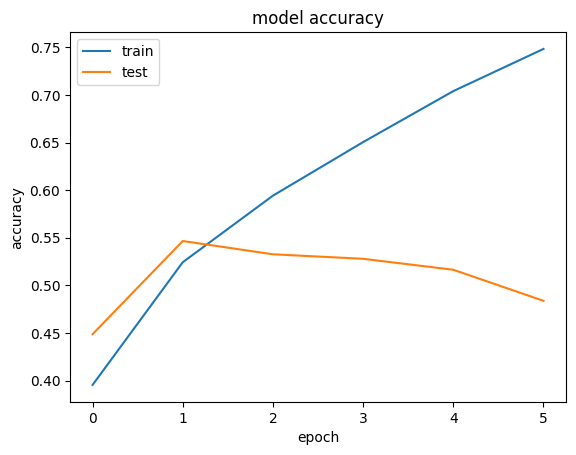

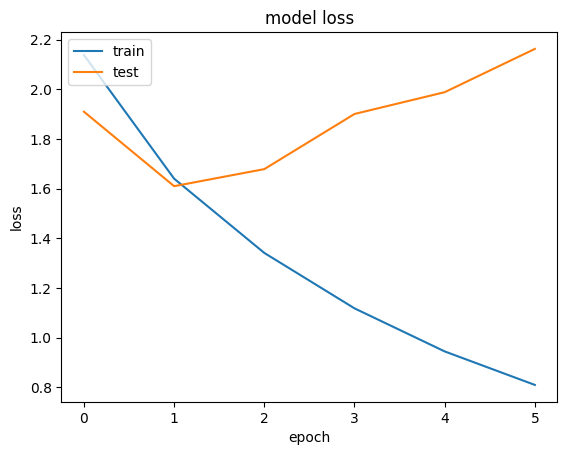

Classification Report
              precision    recall  f1-score   support

           0       0.58      0.67      0.62       772
           1       0.53      0.19      0.28        99
           2       0.57      0.57      0.57       718
           3       0.14      0.14      0.14       638
           4       0.38      0.22      0.28       549
           5       0.54      0.55      0.54       497
           6       0.14      0.04      0.07       228
           7       0.21      0.27      0.23       592
           8       0.28      0.24      0.26       484
           9       0.51      0.52      0.51       353
          10       0.54      0.39      0.45       134
          11       0.85      0.69      0.77       701
          12       0.05      0.02      0.02       190
          13       0.54      0.62      0.58      3272

    accuracy                           0.49      9227
   macro avg       0.42      0.37      0.38      9227
weighted avg       0.48      0.49      0.48      9227



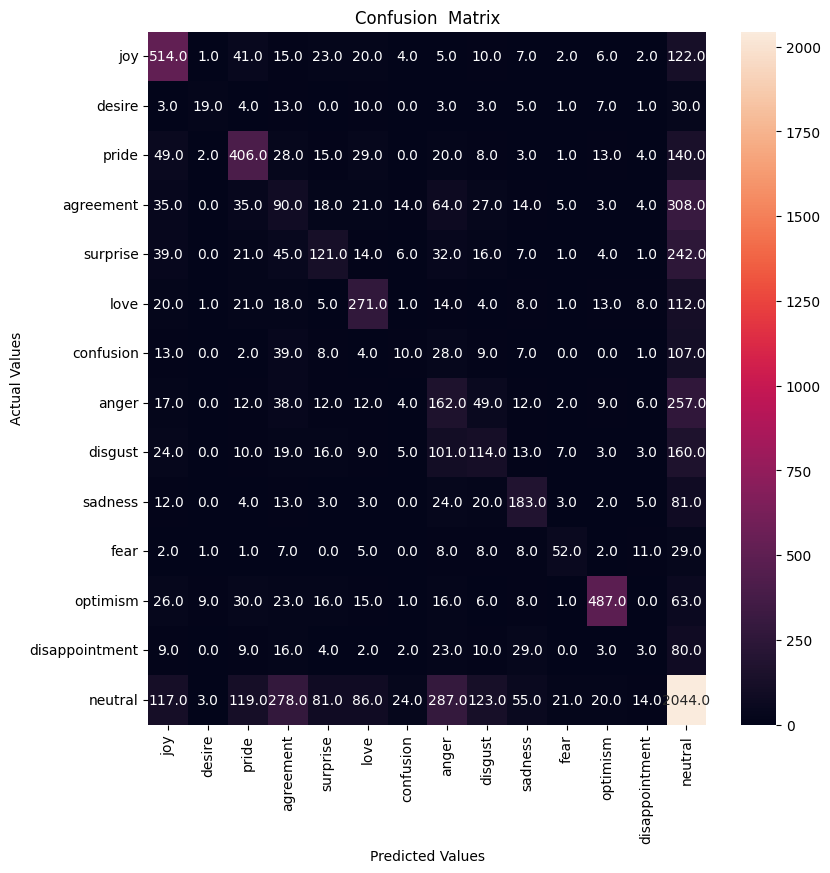

In [14]:
from src.exp.e4 import Exp4
exp4 = Exp4()

exp4.run(emotions, randomState=randomState, lr= 0.01)

In [2]:
!curl -X POST -H 'Content-type: application/json' --data '{ "data": ["I am very puzzeled about the result."] }' 'https://jeevavijay10-senti-pred-gradio.hf.space/run/predict'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0curl: (6) Could not resolve host: application
curl: (3) URL using bad/illegal format or missing URL
curl: (3) bad range in URL position 2:
[I am very puzzeled about the result.]
 ^
